# Intro to DL on the DevCloud

In [9]:
# Make sure we're running TensorFlow 1.9
#!pip install --user tensorflow==1.9.0


You are using pip version 9.0.3, however version 19.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [16]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
print(tf.VERSION)
print(tf.keras.__version__)

1.9.0
2.1.6-tf


In [17]:
#defining our callback to stop when we get great accuracy
class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.998):
      print("\nReached 99.8% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()


# Collect Data

In [18]:
#Load our Data into Two Groups, Training and Validation
(training_images, training_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 6s 1us/step


In [21]:
# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

<IPython.core.display.Javascript object>


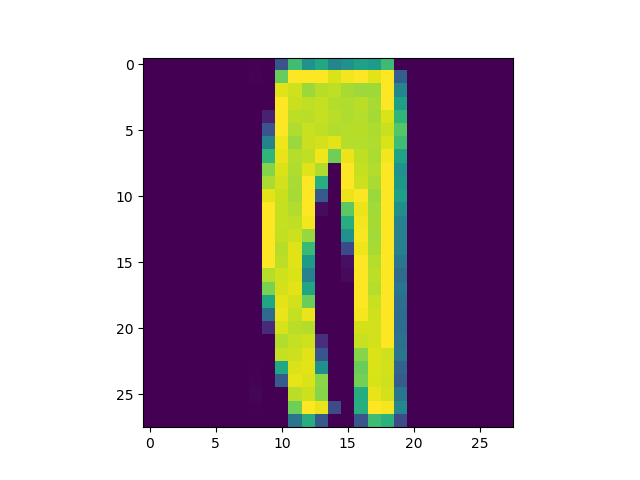

Trouser


In [23]:
#What's in our data?
plt.imshow(test_images[2])
print(fashion_mnist_labels[test_labels[2]])

In [24]:
#Reshape and normalize our images so that they can be fed into a DL Model
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0




# Define Our Model

In [25]:
#Defining our Model in Keras is Easy! 
model = keras.models.Sequential([
    #1 Convolutional layer to extract data
  keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    #1 Pooling Layer to compress the data
  keras.layers.MaxPooling2D(2, 2),
    #Flatten data layer to make it fit
  keras.layers.Flatten(),
    #Then 1 Dense layer that is actually running our inference
  keras.layers.Dense(128, activation='relu'),
    #And then our final layer of outputs, 1 for each of our fashion categories
  keras.layers.Dense(10, activation='softmax')
])

In [26]:
#Let's look at our model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Evaluate the model on test set, even though we haven't trained it, just to see how it does
score = model.evaluate(test_images, test_labels, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.1203


<IPython.core.display.Javascript object>


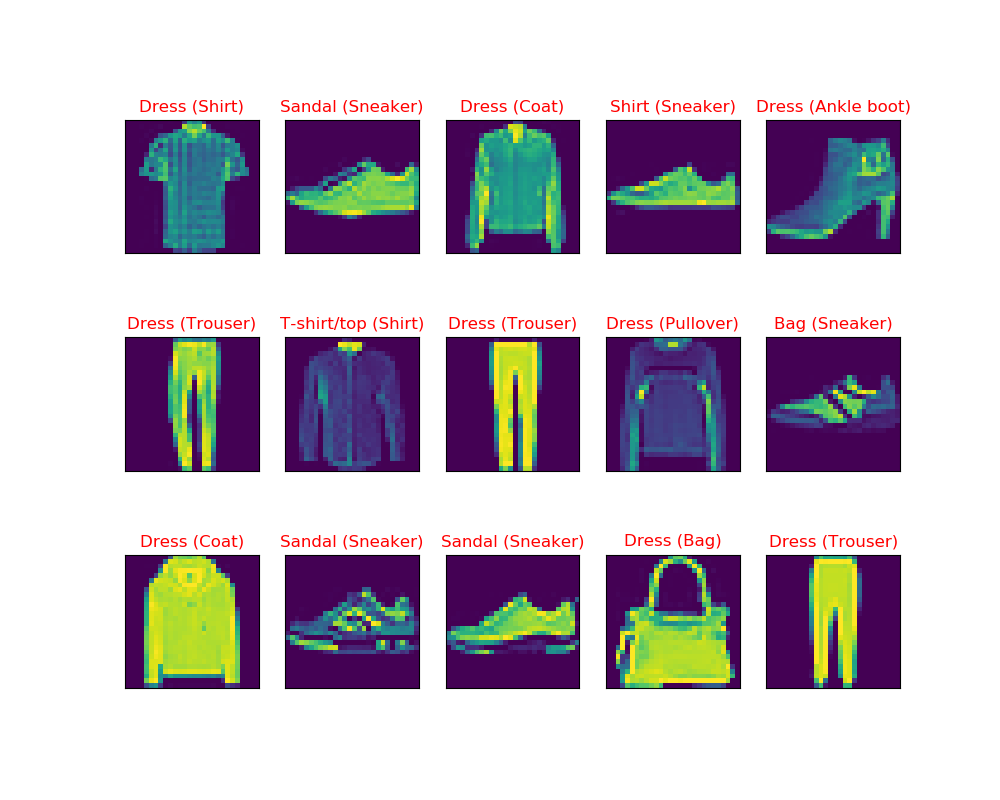

In [28]:
#Let's run our model before training and see how it does
pred_out = model.predict(test_images)
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(10, 8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_label = np.argmax(pred_out[index])
    true_label = test_labels[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_label], 
                                  fashion_mnist_labels[true_label]),
                                  color=("green" if predict_label == true_label else "red"))

# Train our Model

In [ ]:
#Now let's train
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
60000/60000 [==============================] - 33s 548us/step - loss: 0.3989 - acc: 0.8584
Epoch 2/10
33728/60000 [===============>..............] - ETA: 14s - loss: 0.2774 - acc: 0.8991

# Evaluate our Model

In [ ]:
# Evaluate the model on test set again after training
score = model.evaluate(test_images, test_labels, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])

In [ ]:
#Now let's see how our model does
pred_out = model.predict(test_images)
# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(10, 8))
for i, index in enumerate(np.random.choice(test_images.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_images[index]))
    predict_label = np.argmax(pred_out[index])
    true_label = test_labels[index]
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_label], 
                                  fashion_mnist_labels[true_label]),
                                  color=("green" if predict_label == true_label else "red"))